In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df_ad=pd.read_csv("advertising.csv")

In [3]:
df_ad.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
df_ad.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
import seaborn as sns

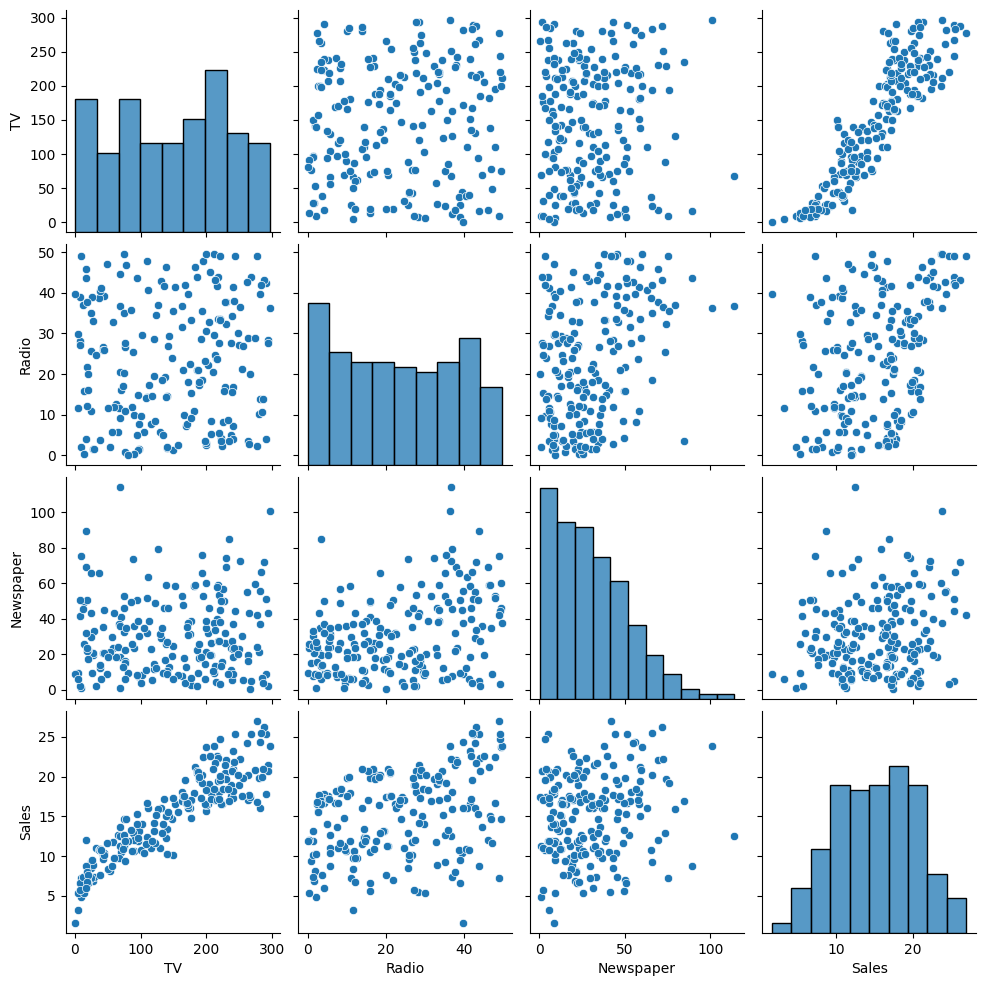

In [6]:
sns.pairplot(df_ad)

In [7]:
df_ad.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


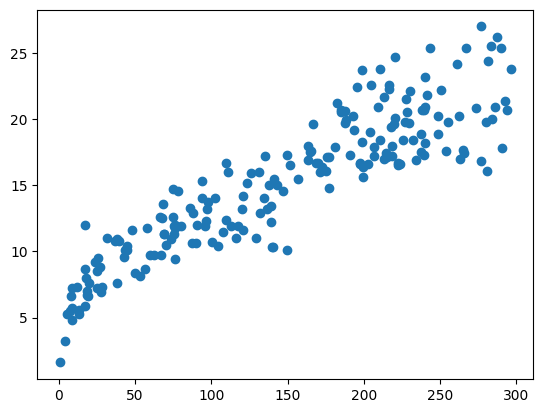

In [8]:
plt.scatter(df_ad['TV'],df_ad['Sales'])

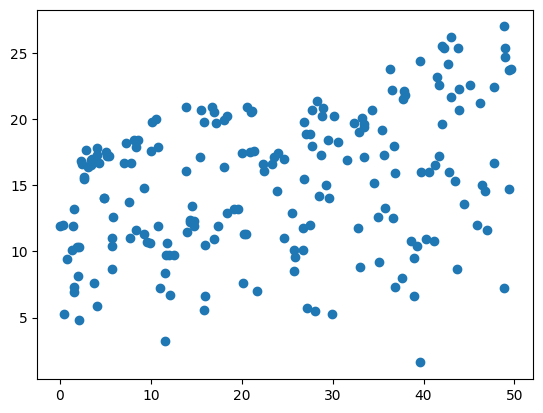

In [9]:
plt.scatter(df_ad['Radio'],df_ad['Sales'])

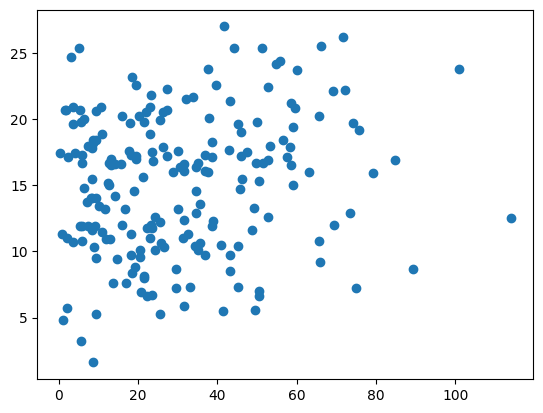

In [10]:
plt.scatter(df_ad['Newspaper'],df_ad['Sales'])

In [11]:
X=df_ad[['TV','Radio','Newspaper']]
Y=df_ad.iloc[:,-1]

In [12]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [13]:
Y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: xlabel='TV', ylabel='Sales'>

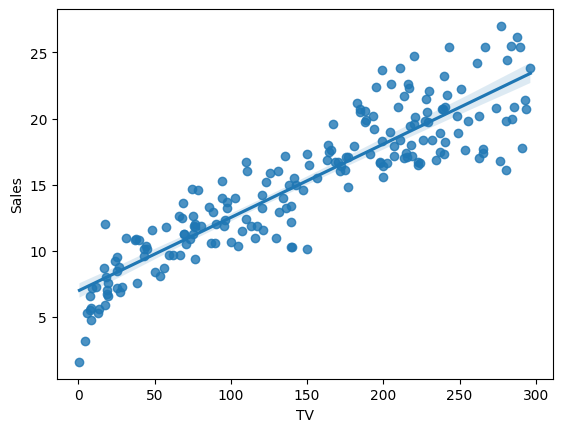

In [16]:
sns.regplot(x=df_ad['TV'],y=df_ad['Sales']) 

<Axes: xlabel='Radio', ylabel='Sales'>

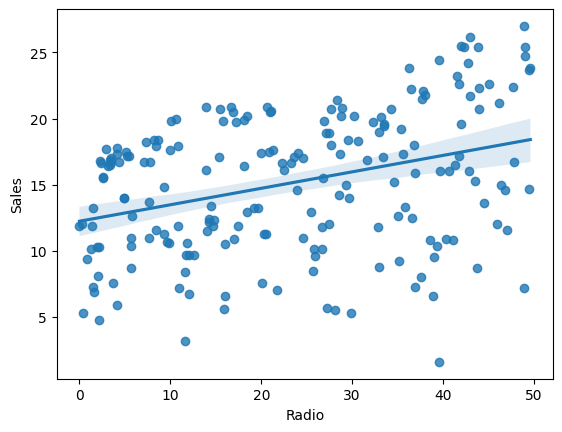

In [17]:
sns.regplot(x=df_ad['Radio'],y=df_ad['Sales']) 

<Axes: xlabel='Newspaper', ylabel='Sales'>

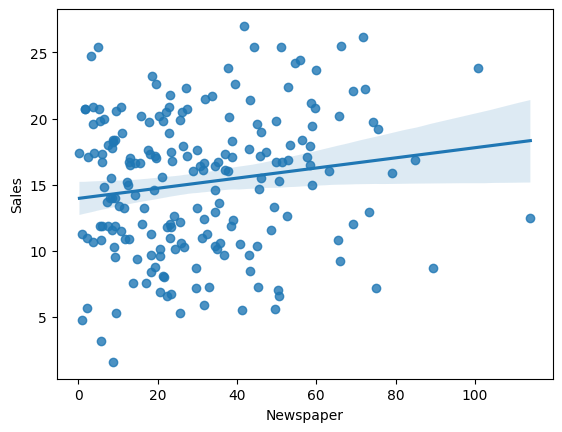

In [18]:
sns.regplot(x=df_ad['Newspaper'],y=df_ad['Sales']) 

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
reg=LinearRegression()

In [24]:
reg.fit(X_train,Y_train)

LinearRegression()

In [25]:
from sklearn.model_selection import cross_val_score
val_score=cross_val_score(reg,X_train,Y_train,scoring='neg_mean_squared_error',
                          cv=3)

In [26]:
val_score

array([-2.70135223, -2.81057341, -3.13236347])

In [27]:
np.mean(val_score)

np.float64(-2.88142970113695)

In [28]:
y_pred=reg.predict(X_test)

In [29]:
y_pred

array([17.04041233, 20.39964377, 23.74740099,  9.25653209, 21.67525948,
       12.56179334, 21.07865662,  8.70895483, 17.28353601, 16.68491851,
        8.92573172,  8.50762572, 18.2530284 ,  8.06003145, 12.68447869,
       14.96677492,  8.12198913, 17.91906169, 11.01929198, 20.4979062 ,
       20.81737524, 12.58662099, 10.88870324, 22.39692163,  9.44183427,
        7.95532725, 20.83706013, 13.83997207, 10.79282849,  7.92309626,
       16.00432589, 10.64496918, 20.79094843, 10.40916722, 21.61788525,
       21.1954234 , 12.10497731, 22.82970275, 12.63229447,  6.49245031,
       11.94463925, 15.3638056 ,  9.91037996,  9.48003396, 17.28192106,
        7.25660905, 10.36937236, 15.25293577, 11.17116856, 11.72114226])

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


2.404067444711889
1.1199940713361776
1.5505055448826648


In [32]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)
print(score)

0.9115647723992757


In [33]:
n = X.shape[0]  # Number of observations
p = X.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - score) * (n - 1) / (n - p - 1)

In [34]:
adjusted_r2

0.9102111719768157

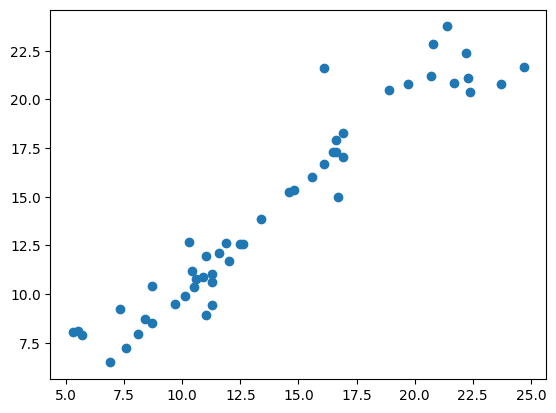

In [35]:
plt.scatter(Y_test,y_pred)

In [36]:
res=Y_test-y_pred 

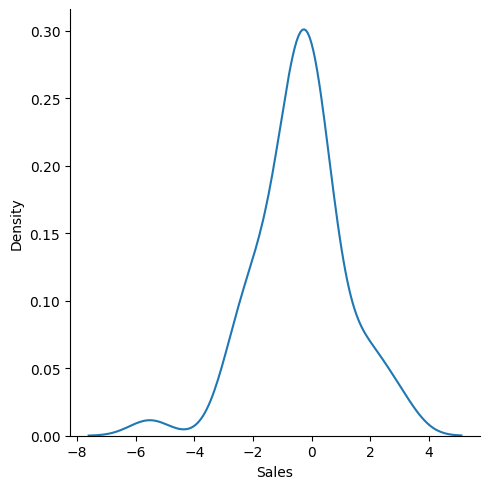

In [37]:
sns.displot(res,kind='kde')

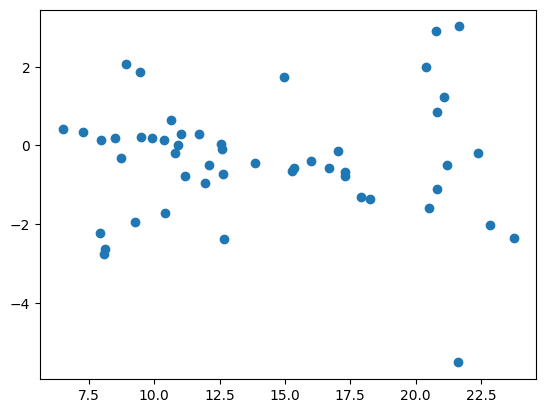

In [38]:
plt.scatter(y_pred,res)

In [39]:
print(reg.predict(scaler.transform([[input("Enter the values for i.ADs in tv, ii.Ads in Radio, iii.Ads in Newspaper") for _ in range(df_ad.shape[1]-1)]])))

[31.53243397]


d:\python\code\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
